In [1]:
import pandas as pd

In [5]:
df=pd.read_excel(r"C:\Users\Admin\Downloads\KNN_project.xlsx")

In [7]:
df.head()

,Age,Total Work Experience,Number of years in city,Cost to Request Ratio,Cibil score,Overdrafts past12months,Total bounces past12months
0,40.50,2,6,0.842666,594,0,0
1,41.25,5,2,0.791667,754,0,0
2,39.50,5,2,0.727273,779,0,0
3,35.00,1,4,0.820232,818,0,0
4,34.00,3,3,0.455581,853,0,1


In [9]:
df.isnull().sum()

Age                           0
Total Work Experience         0
Number of years in city       0
Cost to Request Ratio         0
Cibil score                   0
Overdrafts past12months       0
Total bounces past12months    0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8995 entries, 0 to 8994
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         8995 non-null   float64
 1   Total Work Experience       8995 non-null   int64  
 2   Number of years in city     8995 non-null   int64  
 3   Cost to Request Ratio       8995 non-null   float64
 4   Cibil score                 8995 non-null   int64  
 5   Overdrafts past12months     8995 non-null   int64  
 6   Total bounces past12months  8995 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 492.0 KB


In [11]:
df.describe()

,Age,Total Work Experience,Number of years in city,Cost to Request Ratio,Cibil score,Overdrafts past12months,Total bounces past12months
count,8995.000000,8995.000000,8995.000000,8995.000000,8995.000000,8995.000000,8995.000000
mean,38.808202,2.131073,4.288160,0.831183,752.626570,0.322068,1.162757
std,10.203371,0.892141,1.269416,0.490216,67.645792,0.914998,2.352798
min,18.100000,1.000000,1.000000,0.008466,351.000000,0.000000,0.000000
25%,30.830000,1.000000,3.000000,0.662147,730.000000,0.000000,0.000000
50%,37.200000,2.000000,4.000000,0.800000,768.000000,0.000000,0.000000
75%,45.400000,3.000000,5.000000,0.930908,797.000000,0.000000,1.000000
max,83.800000,5.000000,6.000000,12.006623,882.000000,12.000000,12.000000


In [12]:
import matplotlib.pyplot as plt

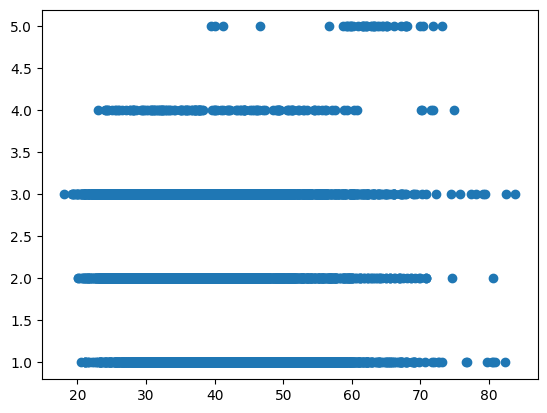

In [14]:
plt.scatter(df['Age'],df['Total Work Experience'])

{'whiskers': [<matplotlib.lines.Line2D at 0x29f7a68a490>,
 'caps': [<matplotlib.lines.Line2D at 0x29f7a68a710>,
 'boxes': [<matplotlib.lines.Line2D at 0x29f7a68a350>],
 'medians': [<matplotlib.lines.Line2D at 0x29f7a68a990>],
 'fliers': [<matplotlib.lines.Line2D at 0x29f7a68aad0>],
 'means': []}

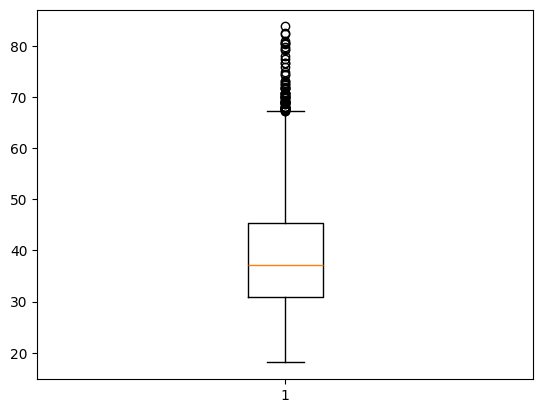

In [16]:
plt.boxplot(df['Age'])

{'whiskers': [<matplotlib.lines.Line2D at 0x29f7a6f1d10>,
 'caps': [<matplotlib.lines.Line2D at 0x29f7a6f1f90>,
 'boxes': [<matplotlib.lines.Line2D at 0x29f7a6f1bd0>],
 'medians': [<matplotlib.lines.Line2D at 0x29f7a6f2210>],
 'fliers': [<matplotlib.lines.Line2D at 0x29f7a6f2350>],
 'means': []}

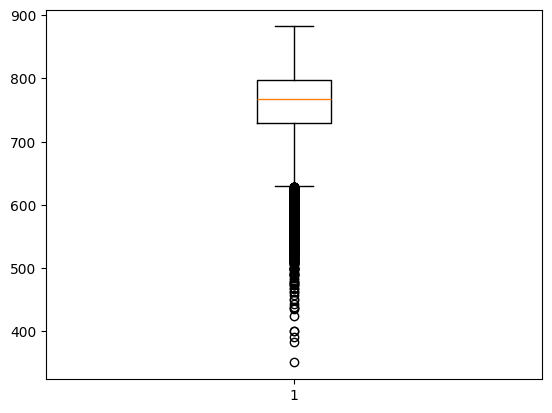

In [17]:
plt.boxplot(df['Cibil score'])

In [18]:
df.head()

,Age,Total Work Experience,Number of years in city,Cost to Request Ratio,Cibil score,Overdrafts past12months,Total bounces past12months
0,40.50,2,6,0.842666,594,0,0
1,41.25,5,2,0.791667,754,0,0
2,39.50,5,2,0.727273,779,0,0
3,35.00,1,4,0.820232,818,0,0
4,34.00,3,3,0.455581,853,0,1


In [22]:
x=df.drop("Total bounces past12months",axis=1)
y=df[['Total bounces past12months']]

In [23]:
from sklearn.model_selection import train_test_split 

In [163]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8)

In [164]:
from sklearn.neighbors import KNeighborsClassifier

In [165]:
model=KNeighborsClassifier()

In [166]:
model.fit(x_train,y_train)

C:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [167]:
model.score(x_train,y_train)

0.6796831573096165

In [168]:
model.score(x_test,y_test)

0.6247915508615898

In [169]:
yp=model.predict(x_test)

In [170]:
yp

array([0, 0, 0, ..., 0, 0, 0], shape=(1799,))

In [171]:
from sklearn.metrics import accuracy_score

In [172]:
accuracy_score(y_test,yp)

0.6247915508615898

In [173]:
train_score=[]
test_score=[]

for i in range (1,15):
    model=KNeighborsClassifier(i)
    model.fit(x_train,y_train)

    train_score.append(model.score(x_train,y_train))
    test_score.append(model.score(x_train,y_train))
    

C:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:239: 

In [174]:
train_score

[1.0,
 0.7426347971095053,
 0.7106725958866037,
 0.6905225125069483,
 0.6796831573096165,
 0.6738465814341301,
 0.6714841578654808,
 0.6687048360200111,
 0.6667593107281823,
 0.6631461923290717,
 0.6624513618677043,
 0.6625903279599777,
 0.6610617009449694,
 0.6602279043913285]

In [175]:
test_score

[1.0,
 0.7426347971095053,
 0.7106725958866037,
 0.6905225125069483,
 0.6796831573096165,
 0.6738465814341301,
 0.6714841578654808,
 0.6687048360200111,
 0.6667593107281823,
 0.6631461923290717,
 0.6624513618677043,
 0.6625903279599777,
 0.6610617009449694,
 0.6602279043913285]

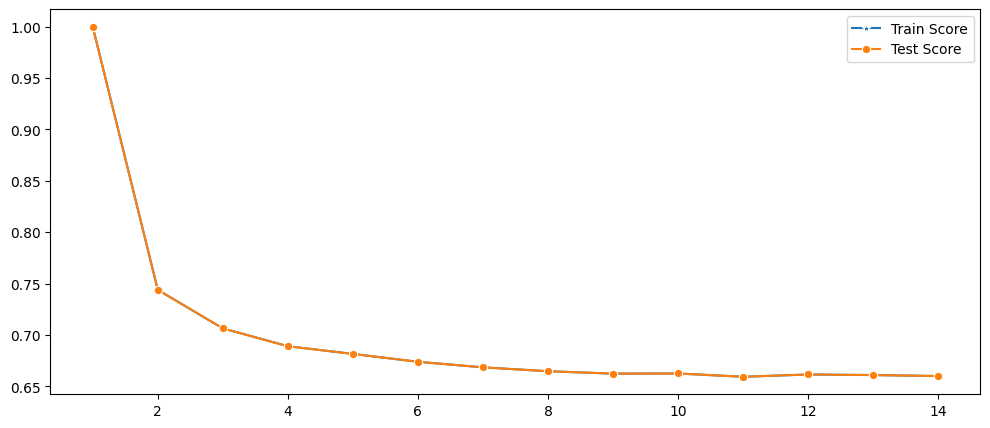

In [148]:
import seaborn as sns
plt.figure(figsize=(12,5))
p = sns.lineplot(x=range(1,15),y=train_score,marker='*',label='Train Score')
p = sns.lineplot(x=range(1,15),y=test_score,marker='o',label='Test Score')
plt.legend()
plt.show()
